In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import visualkeras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
# Print the class labels
print("Class indices:", train_generator.class_indices)

# Print the list of classes
print("Classes:", train_generator.classes)

Found 103 images belonging to 10 classes.
Found 103 images belonging to 10 classes.
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Classes: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


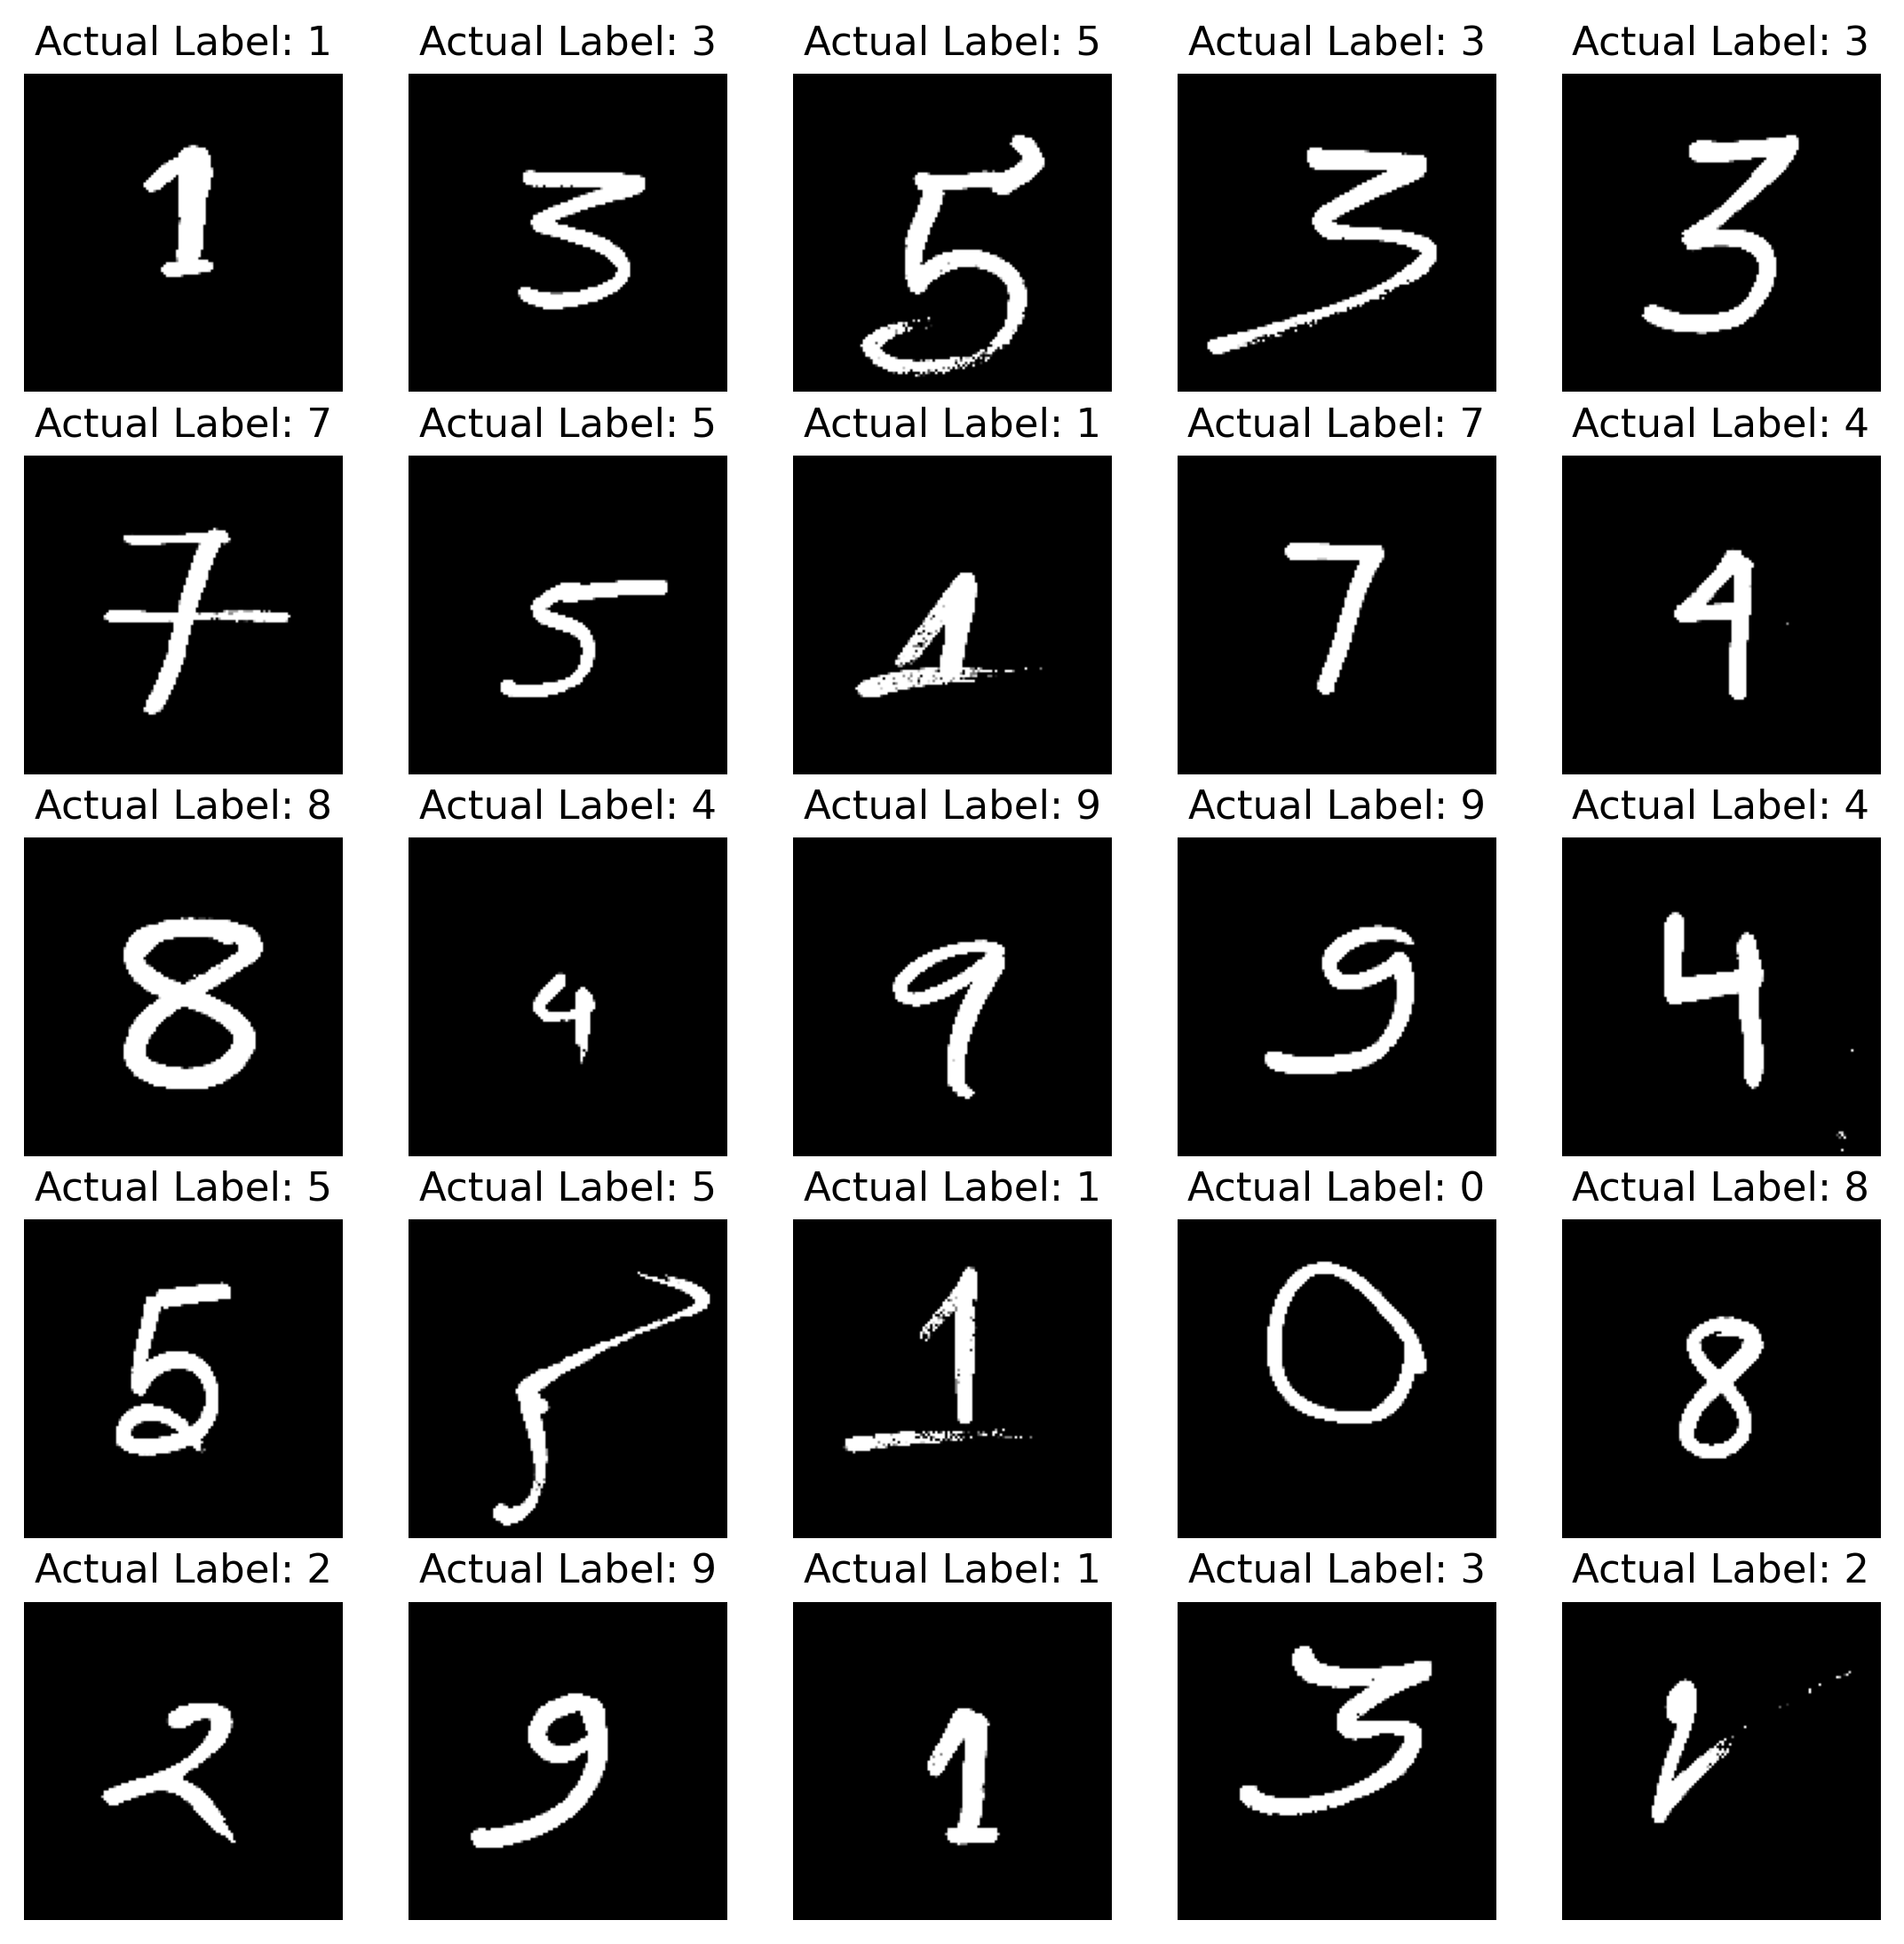

In [20]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Plot the images
plt.figure(figsize=(10, 10), dpi=270)
for i in range(min(25, len(images))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].reshape(128, 128), cmap='gray')
    plt.title(f"Actual Label: {labels[i].argmax()}")
    plt.axis('off')
plt.show()


In [21]:
def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

In [22]:
train_images = images.reshape((-1, 128, 128, 1)).astype('float32') / 255
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(labels)

In [23]:
images, labels = next(train_generator)
print("Images shape:", images.shape)  # Should be (32, 128, 128, 1)
print("Labels shape:", labels.shape)  # Should be (32, 10) for 10 classes

Images shape: (32, 128, 128, 1)
Labels shape: (32, 10)


In [24]:
from tensorflow.keras import layers, models

# Define the model with the correct input shape
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')  # Use '10' if you have 10 classes (0-9 digits)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Print the model summary
model.summary()

C:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 124, 124, 6)         │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 58, 58, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 29, 29, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 13456)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │       1,614,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,426 (6.21 MB)

 Trainable params: 1,628,426 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



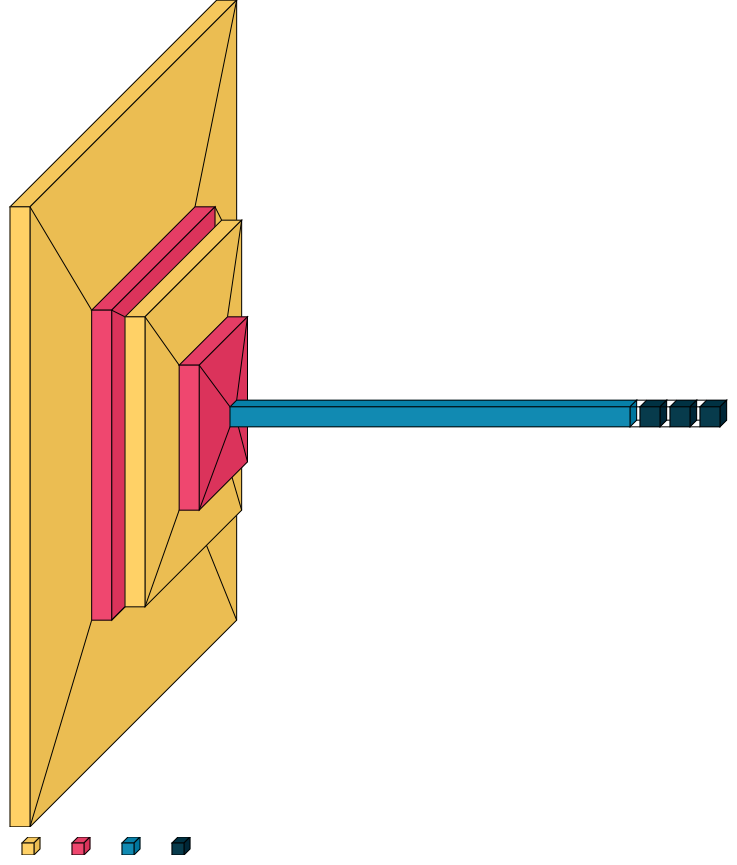

In [25]:
visualkeras.layered_view(model, scale_xy=5, legend=True)

In [39]:
# Train the model
history = model.fit(train_generator, epochs=10, batch_size=64,validation_data=test_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")



# Number of training samples
num_training_samples = train_generator.samples
print(f"Number of training samples: {num_training_samples}")

# Number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 8.7690e-04 - val_accuracy: 1.0000 - val_loss:

In [27]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9940 - loss: 0.0199
Test accuracy: 0.9902912378311157


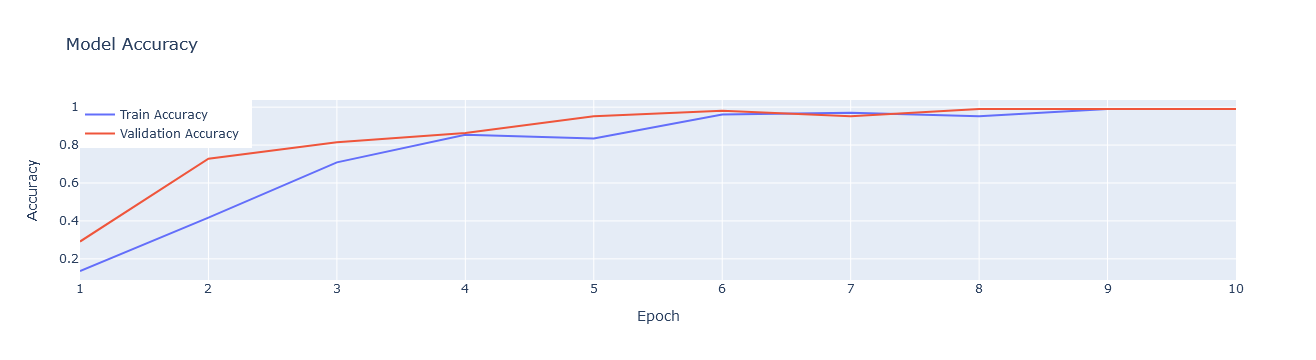

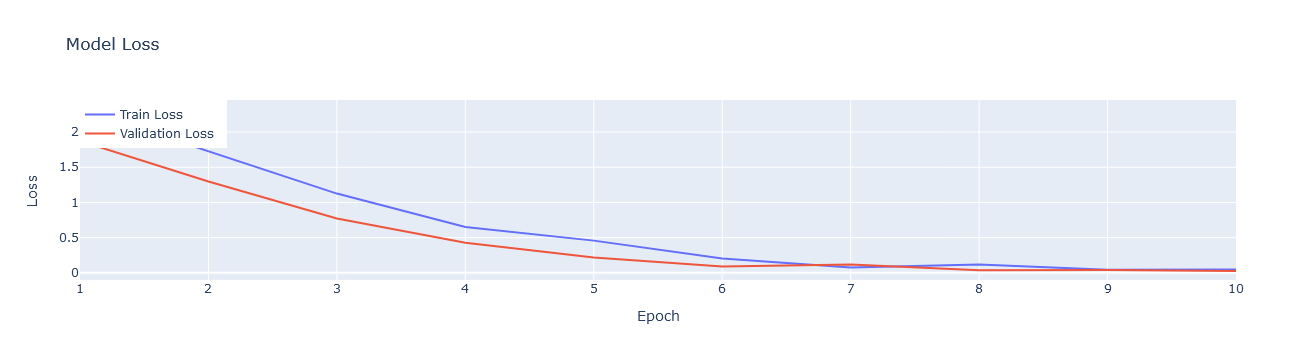

In [28]:
plot_training_history_with_plotly(history)

In [29]:
predictions = model.predict(test_generator)
print(f'Test accuracy: {test_acc}')

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step WARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001AEA6821580> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Test accuracy: 0.9902912378311157


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


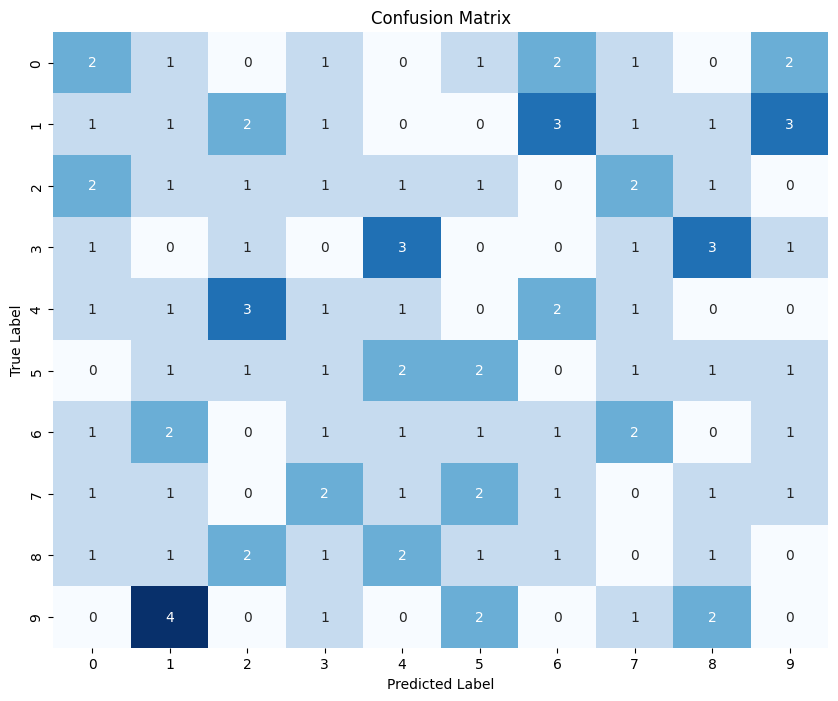


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.20      0.20        10
           1       0.08      0.08      0.08        13
           2       0.10      0.10      0.10        10
           3       0.00      0.00      0.00        10
           4       0.09      0.10      0.10        10
           5       0.20      0.20      0.20        10
           6       0.10      0.10      0.10        10
           7       0.00      0.00      0.00        10
           8       0.10      0.10      0.10        10
           9       0.00      0.00      0.00        10

    accuracy                           0.09       103
   macro avg       0.09      0.09      0.09       103
weighted avg       0.09      0.09      0.09       103



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

true_labels = test_generator.classes

predictions = []
for batch_images, _ in test_generator:
    batch_preds = model.predict(batch_images)
    predictions.extend(batch_preds)
    if len(predictions) >= len(true_labels):
        break

predictions = np.array(predictions[:len(true_labels)])
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))


In [33]:
# Model 1: Simple CNN
model_1 = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Model 2: Deeper CNN
model_2 = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


In [34]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history_1 = model_1.fit(train_generator, epochs=10, validation_data=test_generator)
history_2 = model_2.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.1134 - loss: 2.3255 - val_accuracy: 0.6408 - val_loss: 1.3878
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.6832 - loss: 1.3076 - val_accuracy: 0.8544 - val_loss: 0.6973
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.9105 - loss: 0.5237 - val_accuracy: 0.9417 - val_loss: 0.3525
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.9695 - loss: 0.2948 - val_accuracy: 0.9903 - val_loss: 0.1261
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.9933 - loss: 0.1167 - val_accuracy: 1.0000 - val_loss: 0.0567
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - accuracy: 1.0000 - loss: 0.0497 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 1.0000 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 0.0095
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 1.0000 - val_loss:

In [36]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_generator)
test_loss_2, test_accuracy_2 = model_2.evaluate(test_generator)

print(f"Model 1 Accuracy: {test_accuracy_1:.4f}")
print(f"Model 2 Accuracy: {test_accuracy_2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0019
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 6.4650e-04
Model 1 Accuracy: 1.0000
Model 2 Accuracy: 1.0000


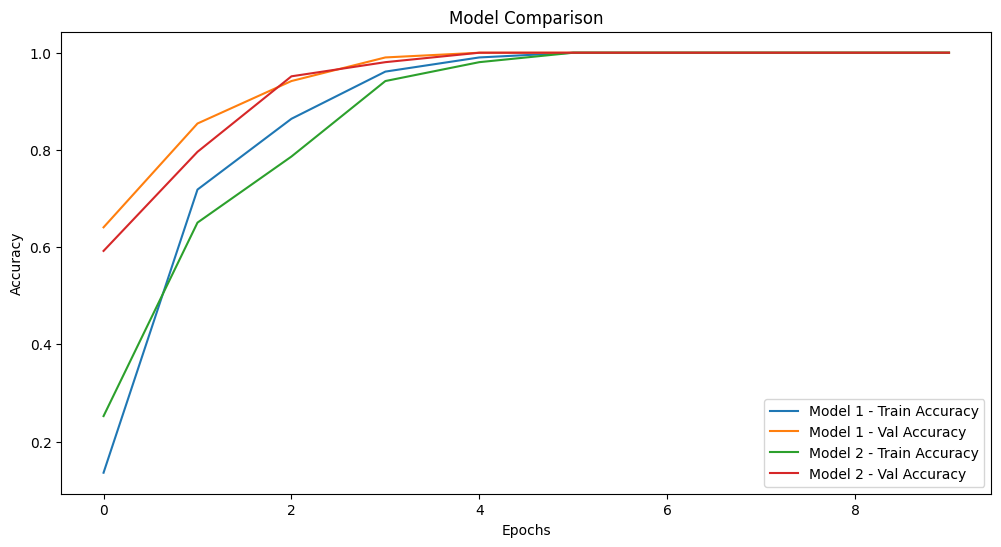

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'], label='Model 1 - Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 - Val Accuracy')
plt.plot(history_2.history['accuracy'], label='Model 2 - Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 - Val Accuracy')
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model.fit(train_generator, epochs=10, batch_size=64,validation_data=test_generator)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 2.5449e-04 - val_accuracy: 1.0000 - val_loss: 3.0505e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 1.9232e-04 - val_accuracy: 1.0000 - val_loss: 2.9129e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 3.5227e-04 - val_accuracy: 1.0000 - val_loss: 2.7666e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 2.5998e-04 - val_accuracy: 1.0000 - val_loss: 2.6387e-04
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 3.0610e-04 - val_accuracy: 1.0000 - val_loss: 2.5218e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 1.0000 - loss: 1.9785e-04 - val_accuracy: 1.0000 - val_loss: 2.4243e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 1.6655e-04 - val_accuracy: 1.0000 - val_loss: 2.3354e-04
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 1.0000 

In [43]:
model.save('custom_model.keras')